In [2]:
!pip install yfinance 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 74.5 MB/s eta 0:00:00:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 76.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 81.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 96.4 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 31.0 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138891 sha256=20cb171c9d0ded5c4f8b1e9cfe684b

In [3]:
import yfinance as yf
tesla = yf.Ticker("TSLA")

tesla_data = tesla.history(period="max")

tesla_data.head() 

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [4]:
pip install beautifulsoup4 requests

Note: you may need to restart the kernel to use updated packages.


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table', {'class': 'historical_data_table table'})
    
    if table:
     
        data = []
         
        rows = table.find_all('tr')
         
        for row in rows[1:]:
            columns = row.find_all('td')
            date = columns[0].text.strip()  
            revenue = columns[1].text.strip()  
            data.append([date, revenue])  
        
        tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
        
        print(tesla_revenue.tail())
    else:
        print('لم يتم العثور على الجدول.')
else:
    print(f'فشل في تحميل الصفحة، كود الاستجابة: {response.status_code}')

    Date Revenue
10  2013  $2,013
11  2012    $413
12  2011    $204
13  2010    $117
14  2009    $112


In [9]:
import yfinance as yf
import pandas as pd


gme_data = yf.download('GME')

gme_data_reset = gme_data.reset_index()

print(gme_data_reset.head())

gme_data_reset.to_csv('gme_data.csv', index=False)

[*********************100%***********************]  1 of 1 completed

        Date     Open     High      Low    Close  Adj Close    Volume
0 2002-02-13  2.40625  2.51500  2.38125  2.51250   1.691667  76216000
1 2002-02-14  2.54375  2.54875  2.48125  2.50000   1.683251  11021600
2 2002-02-15  2.50000  2.50625  2.46250  2.48750   1.674834   8389600
3 2002-02-19  2.47500  2.47500  2.34375  2.38750   1.607504   7410400
4 2002-02-20  2.40000  2.46875  2.38125  2.46875   1.662210   6892800


In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}


url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
response = requests.get(url, headers=headers)


if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    
   
    table = soup.find('table', {'class': 'historical_data_table table'})
    
    if table:
       
        data = []
            
        rows = table.find_all('tr')
          
        for row in rows[1:]:
            columns = row.find_all('td')
            date = columns[0].text.strip()  
            revenue = columns[1].text.strip()  
            data.append([date, revenue])  
        
        gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
     
        print(gme_revenue.tail())

       
        gme_revenue.to_csv('gme_revenue.csv', index=False)
    else:
        print('لم يتم العثور على الجدول.')
else:
    print(f'فشل في تحميل الصفحة، كود الاستجابة: {response.status_code}')

    Date Revenue
11  2013  $8,887
12  2012  $9,551
13  2011  $9,474
14  2010  $9,078
15  2009  $8,806


In [16]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


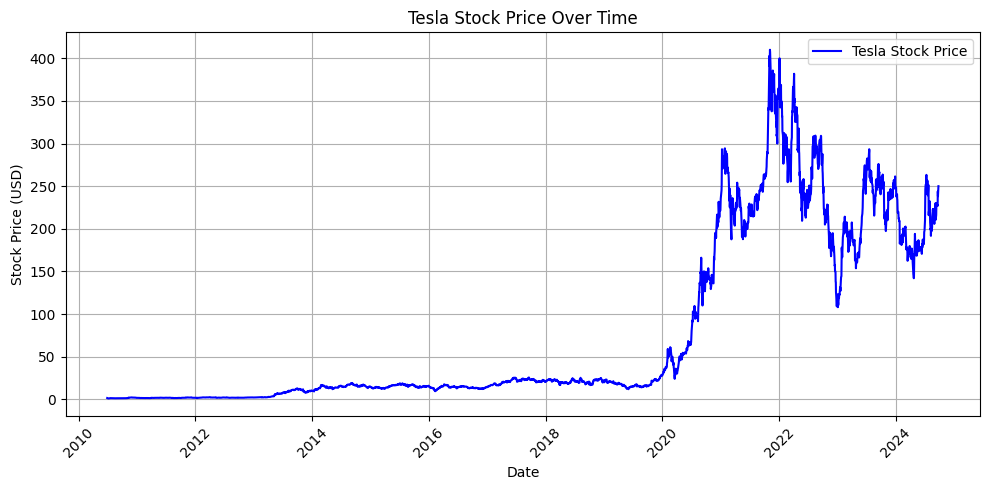

In [17]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data['Date'], data['Close'], label='Tesla Stock Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.xticks(rotation=45)  
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  
    plt.show()

tesla_data_reset = tesla_data.reset_index()
make_graph(tesla_data_reset, 'Tesla Stock Price Over Time')

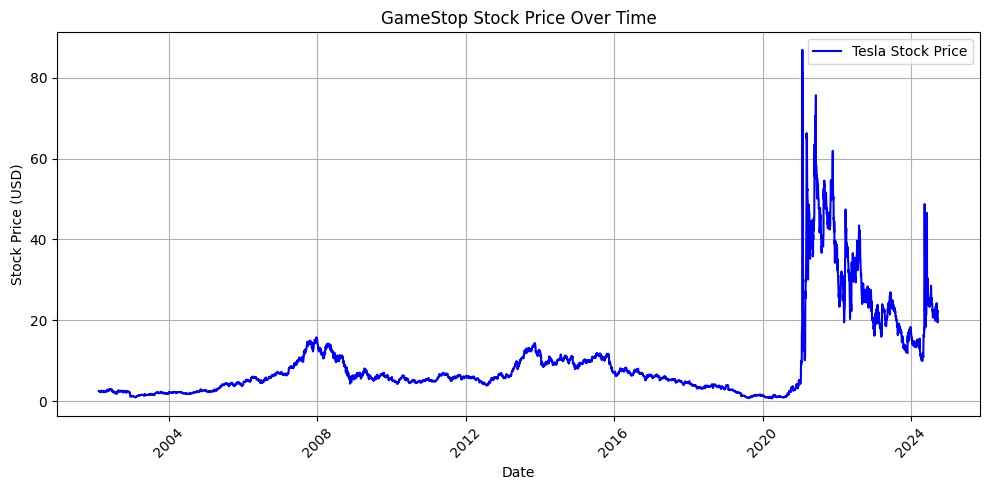

In [18]:

make_graph(gme_data_reset, 'GameStop Stock Price Over Time')